Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Your task is to make a mode that can consider the data provided and predict the Average Price.

In [21]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [22]:
df = pd.read_csv(r"avocado.csv",engine='python')

In [23]:
df.shape

(16468, 14)

In [24]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


The dataset comprises of 16468 observations of 14 columns. Below is a table showing names of all the columns and their description.

The unclear numerical variables terminology is explained in the next section:

Features	Description
‘Unamed: 0’	 index feature that will be removed later
‘Total Volume’	Total sales volume of avocados
‘4046’	Total sales volume of Small/Medium Hass Avocado
‘4225’	Total sales volume of Large Hass Avocado
‘4770’	Total sales volume of Extra Large Hass Avocado
‘Total Bags’	Total number of Bags sold
‘Small Bags’	Total number of Small Bags sold
‘Large Bags’	Total number of Large Bags sold
‘XLarge Bags’	Total number of XLarge Bags sold


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [26]:
df.isnull().sum() 

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [27]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [28]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [29]:
df.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [30]:
# Date is Object type not the date type. We have to change its type to date type.

In [31]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [32]:
df.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12.0,27.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12.0,20.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12.0,13.0
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6.0,12.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11.0,29.0


* Data Visualisation. 
Let's see if this is also the case with our dataset

First let's take a look at the distribution.

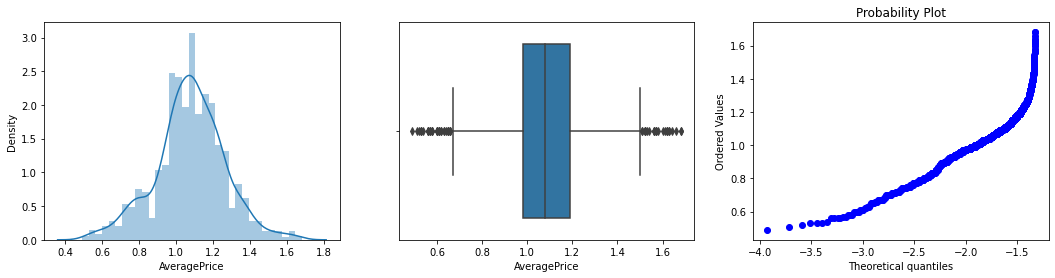

In [33]:
import seaborn as sns
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
sns.distplot(df.AveragePrice, ax=ax[0])
sns.boxplot(df.AveragePrice, ax=ax[1])
from scipy import stats
stats.probplot(df['AveragePrice'], plot=ax[2])
plt.show()

Conclusion: Bimodal distribution because conventional versus organic.

In [34]:
df['type'].unique()

array(['conventional', nan], dtype=object)

there are two types: conventional and organic

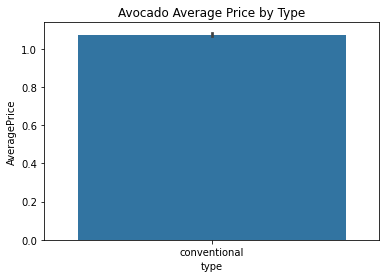

In [35]:
plt.figure()
plt.title("Avocado Average Price by Type")
sns.barplot(x="type",y="AveragePrice",data= df)
plt.show()

In [36]:
conventional = len(df[df.type== "conventional"])
organic = len(df[df.type == "organic"])
print("Percentage of conventional: {:.2f}%".format((conventional / (len(df.type))*100)))
print("Percentage of organic: {:.2f}%".format((organic / (len(df.type))*100)))

Percentage of conventional: 9.21%
Percentage of organic: 0.00%


Conclusion: data is almost 50% conventional and 50% organic.

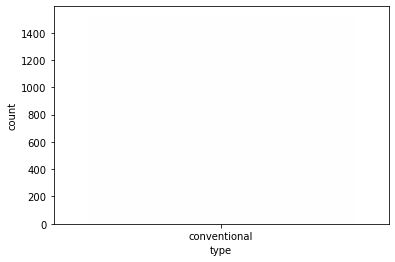

In [37]:
sns.countplot(x="type", data=df, palette="bwr")
plt.show()

In [38]:
print("Skewness: %f" % df['AveragePrice'].skew())


Skewness: -0.109444


 skewness fall between − 3 and + 3. so it is acceptable

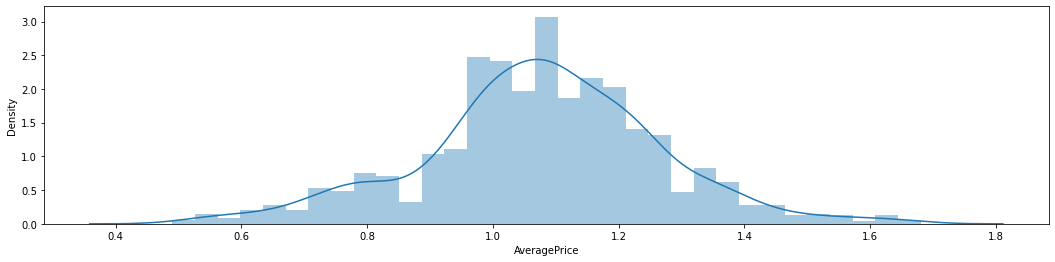

In [39]:
df_conventional = df[df['type'] == 'conventional']
# df_conventional.shape
df_organic = df[df['type'] == 'organic']
# df_organic.shape
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))
sns.distplot(df_conventional['AveragePrice']) # histogram
sns.distplot(df_organic['AveragePrice']) # histogram
plt.show()

Conclusion: The organic avocados are more expensive.

In [40]:
mask = df['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=df[mask],
    hue='year',size=13,aspect=0.8,palette='Spectral',join=False,)

ValueError: min() arg is an empty sequence

Conclusion: The price not only depends on the type, but also on the region.

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
ax.set_title("Correlation Matrix", fontsize=16)
filter = df.columns != 'id'
sns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)

Total Volume (98) and Total Bags (99) also have a strong correlation.
all the Features are not correleted with the Average Price column
instead most of them are correlated with each other.

In [ ]:
print(f"Missing data: {df.isna().sum(axis=0).any()}")


In [ ]:
df['type']= df['type'].map({'conventional':0,'organic':1})

# Extracting month from date column.
df.Date = df.Date.apply(pd.to_datetime)
df['Month'] = df['Date'].apply(lambda x:x.month)
df.drop('Date',axis=1,inplace=True)
df.Month = df.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

In [ ]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

Average Price distribution shows that for most cases price of avocado is between 1.1, 1.4.

In [ ]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

 there was a hike between months 8 – 10 for Avocados prices

In [ ]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='year',  data=df)
plt.show()

 there was a hike between months 8 – 10 for Avocados prices every year and maximum with 2018

In [ ]:
Year = df[['Total Volume' ,'AveragePrice']].groupby(df.year).sum()
Year.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

a strong dip is observed after 2017 

In [ ]:
Month = df[['Total Volume', 'AveragePrice']].groupby(df.Month).sum()
Month.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

In [ ]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='Total Volume', y = 'AveragePrice', hue= 'type', data= df)


Conclusion: The organic avocados are more expensive.

In [ ]:
variant = df[['4046', '4225', '4770']].groupby(df.Month).sum()
variant.plot(kind='line', fontsize = 14, figsize=(14,8))

In [ ]:
Bags = df[['Small Bags', 'Large Bags']].groupby(df.region).sum()
Bags.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

shows demand of small bags,large bags is high in tampa region .

In [ ]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Looks like these region are where price is very high
HartfordSpringfield
SanFrancisco
NewYork
Philadelphia
Sacramento

In [ ]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

there was a huge increase in Avocado prices as the demand was little high in Year 2017 in SanFranciso region

In [ ]:
dummies = pd.get_dummies(df[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([df[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = df['AveragePrice']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)


In [ ]:
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [ ]:
from sklearn.linear_model import LinearRegression
lrg=LinearRegression()
lrg.fit(X_train,y_train)
pred=lrg.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

In [ ]:
cv_score= cross_val_score(lrg,X_train,y_train, cv=5)
np.mean(cv_score)


In [ ]:
y_pred = lrg.predict(X_test)
lrg.score(X_test,y_test)

In [ ]:
test_pred = lrg.predict(X_test)
train_pred = lrg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [ ]:
cv_score= cross_val_score(rdr,X_train,y_train, cv=5)
np.mean(cv_score)

In [ ]:
sns.distplot((y_test-pred),bins=50)

residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
model = XGBRegressor()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred})

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [ ]:
cv_score= cross_val_score(model,X_train,y_train, cv=5)
np.mean(cv_score)

  RMSE is lower than the previous ones we got with Linear Regression,random forest

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

In [ ]:
cv_score= cross_val_score(lrg,X_train,y_train, cv=5)
np.mean(cv_score)

out of all XGBoost has a score of 89% which is pretty good. 

MAE: 0.09510624657534247
MSE: 0.018950787589041104
RMSE: 0.13766185960185598
    
having cv score of 0.887672496579831

In [ ]:
# saving the model

In [ ]:
best_model = XGBRegressor()
best_model.fit(X_train,y_train)

In [ ]:
# SAVING THE BEST MODEL:
import joblib
joblib.dump(best_model,'avocado.pkl')

Conclusions
EDA can be carried out using Pandas and other plotting libraries.
Also I have seen making use of packages like matplotlib, plotly and seaborn to develop better insights about the data.

I have seen the impact of columns like type, year/date on the Average price increase/decrease rate.
I get to know what are the features on which price is highly positively and negatively coorelated with.
I came to know through analysis which model will be work with better accuracy with the help of low residual and RMSE scores.
 Also get to know where to use Linear, xgbooster and other applicable and required models to fine tune the predictions.